In [27]:
import nltk

# 영어 워드
### 1. 말뭉치 가져오기

In [28]:
nltk.download('book', quiet=True)
from nltk.book import *

In [29]:
#저작권 말소된 책 데이터
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [30]:
emma_raw=nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_raw[:1000]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice of 

### 2. 토큰 생성  
- 자연어 문서에서 분석을 위해 긴 문자열을 작은 단위로 나누는 것
- 문장 단위, 단어 단위, 정규표현식으로 나눌 수 있음  



#### 2.1. 문장 단위로 토큰 생성

In [31]:
#문장단위 토큰 생성
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[1])

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.


#### 2.2 단어 단위로 토큰 생성 

In [32]:
#단어단위 토큰 생성
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[50:100]))

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


#### 2.3 정규표현식으로 기호를 제외한 토큰 생성

In [33]:
#정규표현식 토큰 생성
from nltk.tokenize import RegexpTokenizer
retTokenize=RegexpTokenizer("[\w]+")
print(retTokenize)
token3=retTokenize.tokenize(emma_raw[:1000])
token3

RegexpTokenizer(pattern='[\\w]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)


['Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 's',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'had'

### 3. 형태소 분석
  
- 형태소 : 언어학에서 일정한 의미가 있는 가장 작은 말의 단위
- 보통 자연어 처리에서 토큰으로 형태소를 이용
- 형태소 분석 : 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업
- 형태소 분석의 예
    - 어간 추출
    - 원형 복원
    - 품사 부착

#### 3.1. 어간 추출  
- PorterStemmer, LancasterStemmer 제공
- 어간 추출은 단순히 어미만 제거함

- `[st1.stem(w) for w in words]` 는 아래 코드를 함축한 것이다.
    ``` python
    list1=[]
    for w in words:
        list1.append(st1.stem(w))
    print(list1)
    ```

In [34]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1= PorterStemmer()
st2= LancasterStemmer()

words=['fly','flies','flying','flew','flown']
print("Porter stemmer: ", [st1.stem(w) for w in words])
print("LancasterStemmer: ", [st2.stem(w) for w in words])

Porter stemmer:  ['fli', 'fli', 'fli', 'flew', 'flown']
LancasterStemmer:  ['fly', 'fli', 'fly', 'flew', 'flown']


### 4. 원형복원
- 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업
- WordNetLemmatizer 사용 

In [35]:
from nltk.stem import WordNetLemmatizer

#### 4.1. 동사원형을 만들어주는 객체를 생성 

In [36]:
lm=WordNetLemmatizer()
[lm.lemmatize(w, 'v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

### 5. 품사부착
- 품사는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것
- 품사의 예
    * NNP : 고유명
    * VBP : 동사현재형
    * NN : 명사
    * DT : 관형사

#### 5.1. 품사 부착

In [37]:
from nltk.tag import pos_tag
sentence='Emma refused to permit us to obtain the refuse permit'
# tagged_list= pos_tag(word_tokenize(sentence))
tagged_list= pos_tag(token3)
tagged_list

[('Emma', 'NN'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('

- 태크 정의 확인하는 법 

In [38]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


#### 5.2. (응용)특정 품사만 추출하기

In [39]:
noun_list=[t[0] for t in tagged_list if t[1]=="NN"]
noun_list

['Emma',
 'clever',
 'home',
 'disposition',
 'existence',
 'world',
 'indulgent',
 'father',
 'consequence',
 'sister',
 's',
 'marriage',
 'mistress',
 'house',
 'period',
 'mother',
 'remembrance',
 'place',
 'woman',
 'governess',
 'mother',
 'affection',
 'family',
 'governess',
 'fond',
 'intimacy',
 'office',
 'governess',
 'mildness',
 'o']

In [40]:
list1=[]
for t in tagged_list:
    list1.append(t)
list1

[('Emma', 'NN'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('

In [41]:
noun_list=[t[0] if t[1]=="NN" else '_' for t in tagged_list ]
noun_list

['Emma',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'clever',
 '_',
 '_',
 '_',
 '_',
 '_',
 'home',
 '_',
 '_',
 'disposition',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'existence',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'world',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'indulgent',
 'father',
 '_',
 '_',
 '_',
 'consequence',
 '_',
 '_',
 'sister',
 's',
 'marriage',
 '_',
 'mistress',
 '_',
 '_',
 'house',
 '_',
 '_',
 '_',
 '_',
 'period',
 '_',
 'mother',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'remembrance',
 '_',
 '_',
 '_',
 '_',
 '_',
 'place',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'woman',
 '_',
 'governess',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'mother',
 '_',
 'affection',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'family',
 '_',
 '_',
 '_',
 'governess',
 '_',
 '_',
 '_',
 '_',
 

In [42]:
list1=[]
for t in tagged_list:
    if t[1]=='NN':
        list1.append(t[0])
    else:
        list1.append('_')
list1

['Emma',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'clever',
 '_',
 '_',
 '_',
 '_',
 '_',
 'home',
 '_',
 '_',
 'disposition',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'existence',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'world',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'indulgent',
 'father',
 '_',
 '_',
 '_',
 'consequence',
 '_',
 '_',
 'sister',
 's',
 'marriage',
 '_',
 'mistress',
 '_',
 '_',
 'house',
 '_',
 '_',
 '_',
 '_',
 'period',
 '_',
 'mother',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'remembrance',
 '_',
 '_',
 '_',
 '_',
 '_',
 'place',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'woman',
 '_',
 'governess',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'mother',
 '_',
 'affection',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'family',
 '_',
 '_',
 '_',
 'governess',
 '_',
 '_',
 '_',
 '_',
 

In [43]:
from nltk.tag import untag
untag_list= untag(tagged_list)
untag_list

['Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 's',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'had'

### 6. Text 클래스
- 문서 분석에 유용한 메소드 제공 

In [53]:
from nltk import Text
text=Text(retTokenize.tokenize(emma_raw))
print(text)

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


#### 6.1. Text() 인스턴스는 plot() 함수를 사용 가능
- matplotlib

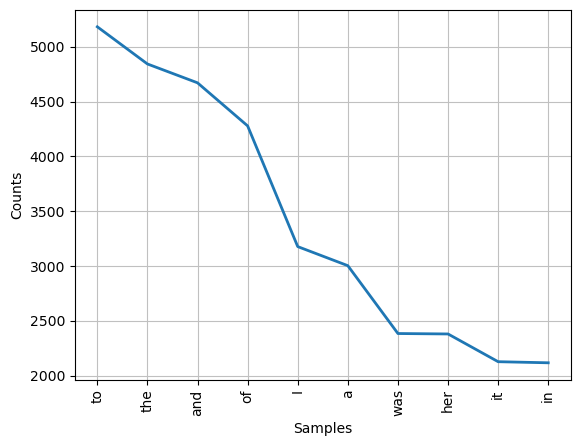

In [45]:
import matplotlib.pyplot as plt
text.plot(10)
plt.show()

#### 6.2. dispersion_plot
- 단어가 사용된 위치를 분산 그래프로 보여줌

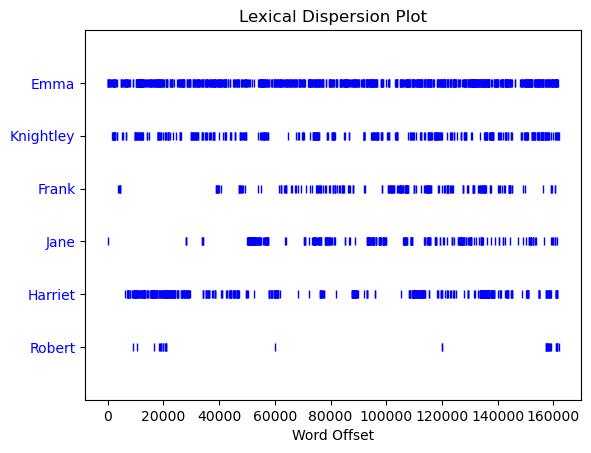

In [46]:
text.dispersion_plot(['Emma','Knightley', 'Frank', 'Jane', 'Harriet', 'Robert'])

#### 6.3. concordance() 함수
- 단어가 사용된 위치를 직접 표시하며, 문맥의 정보를 보여줌 

In [47]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [48]:
text.common_contexts('Emma','her')

No common contexts were found


In [49]:
fd=text.vocab()
type(fd)

nltk.probability.FreqDist

In [50]:
from nltk import FreqDist
stopwords=['Mr.','Mrs.','Miss','Mr','Mrs','Dear', 'A', 'No', 'Ah', 'Oh']       #고유명사에서 제외할 words
emma_token=pos_tag(retTokenize.tokenize(emma_raw))
emma_token

[('Emma', 'NN'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('

In [51]:
name_list=[t[0] for t in emma_token if t[1]=='NNP' and t[0] not in stopwords]
name_list

['Jane',
 'Austen',
 'VOLUME',
 'Emma',
 'Woodhouse',
 'Sixteen',
 'Taylor',
 'Woodhouse',
 'Emma',
 'Between',
 'Taylor',
 'Emma',
 'Taylor',
 'Emma',
 'Sorrow',
 'Taylor',
 'Taylor',
 'Emma',
 'Weston',
 'Taylor',
 'Isabella',
 'How',
 'Emma',
 'Weston',
 'Taylor',
 'Woodhouse',
 'Her',
 'London',
 'October',
 'November',
 'Hartfield',
 'Christmas',
 'Isabella',
 'Highbury',
 'Hartfield',
 'Taylor',
 'Emma',
 'Matrimony',
 'Taylor',
 'Taylor',
 'Hartfield',
 'Emma',
 'Poor',
 'Taylor',
 'Weston',
 'Weston',
 'Taylor',
 'How',
 'Randalls',
 'James',
 'Weston',
 'Weston',
 'James',
 'Randalls',
 'Hannah',
 'Nobody',
 'Hannah',
 'James',
 'James',
 'Whenever',
 'Taylor',
 'Whenever',
 'James',
 'Emma',
 'Knightley',
 'Isabella',
 'Highbury',
 'London',
 'Hartfield',
 'Brunswick',
 'Square',
 'Woodhouse',
 'Knightley',
 'Isabella',
 'Woodhouse',
 'Knightley',
 'Dirty',
 'Look',
 'Well',
 'Who',
 'Taylor',
 'Tis',
 'Poor',
 'Woodhouse',
 'Taylor',
 'Emma',
 'Emma',
 'Woodhouse',
 'My',
 '

In [52]:
fd_name=FreqDist(name_list)
fd_name

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})